# The problem statement is given in the word file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<b> Importing the dataset </b>

In [2]:
data=pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Exploring the data and cleaning it

In [3]:
data.shape

(28382, 21)

In [4]:
data.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [7]:
missing = ['gender','dependents','occupation','city','days_since_last_transaction']

for i in missing:
    print("************"+i+"*************")
    print(data[i].value_counts())
    if data[i].dtype != 'O':
        print('Median : '+str(data[i].median()))
        data[i].fillna(data[i].median(),inplace=True)
    else:
        data[i].fillna(data[i].mode()[0],inplace=True)

************gender*************
Male      16548
Female    11309
Name: gender, dtype: int64
************dependents*************
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
52.0        1
25.0        1
8.0         1
50.0        1
9.0         1
36.0        1
32.0        1
Name: dependents, dtype: int64
Median : 0.0
************occupation*************
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64
************city*************
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
1601.0       1
1093.0       1
1313.0       1
1391.0       1
1174.0       1
Name: city, Length: 1604, dtype: int64
Median : 834.0
************days_since_last_transaction*************
0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
288.0       1
92.0        1
321.0       1
134.0    

In [8]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [9]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [10]:
data.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [11]:
data=data.astype({'customer_nw_category':'object', 'dependents':'object', 'city':'object'})

In [12]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                               object
customer_nw_category               object
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [13]:
# correlation
data.corr()

,customer_id,vintage,age,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.000286,0.009699,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,-0.380714,-0.081342,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.058990,-0.012578,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
branch_code,-0.000286,-0.380714,-0.058990,1.000000,0.041643,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.009699,-0.081342,-0.012578,0.041643,1.000000,-0.017561,-0.012221,-0.010567,-0.005229,-0.030271,-0.064680,-0.035210,-0.062418,-0.015440,-0.009708,-0.040030
current_balance,0.006589,0.002986,0.054346,0.000181,-0.017561,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000214,-0.012221,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,0.004485,0.003433,0.061708,0.001955,-0.010567,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960
average_monthly_balance_prevQ2,-0.002532,0.002244,0.059607,0.001310,-0.005229,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.018376
current_month_credit,0.002494,0.002848,0.023840,-0.013988,-0.030271,0.030371,0.032493,0.033639,0.036271,1.000000,0.168561,0.937021,0.135729,0.034182,0.038254,0.020755


<b> Univariate Analysis using Box Plot </b>

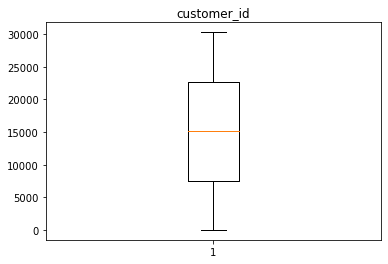

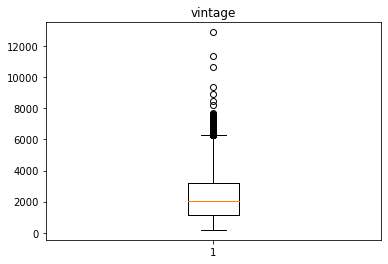

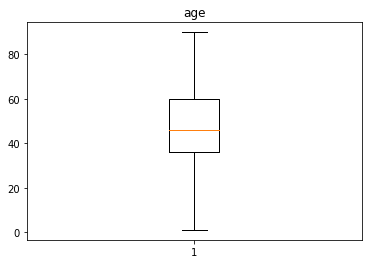

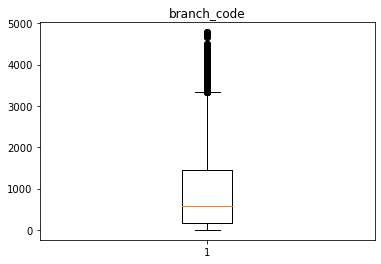

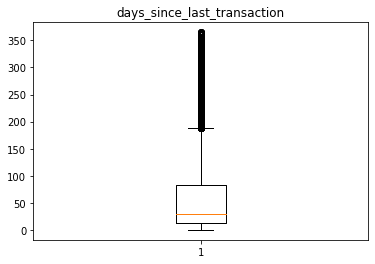

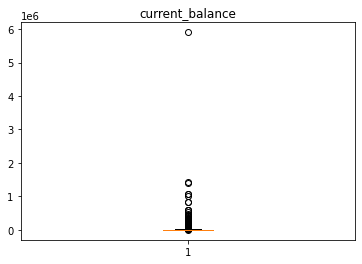

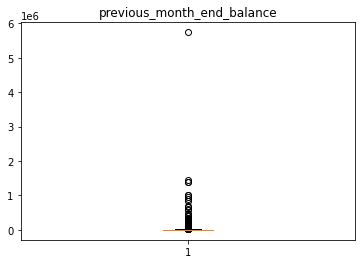

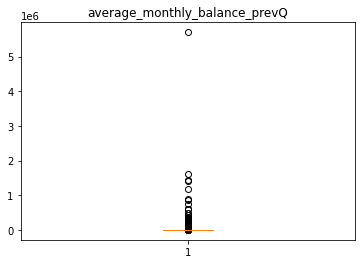

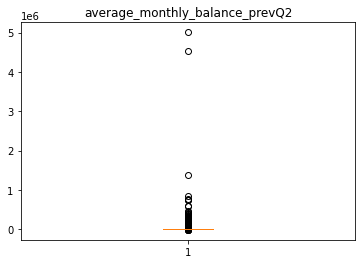

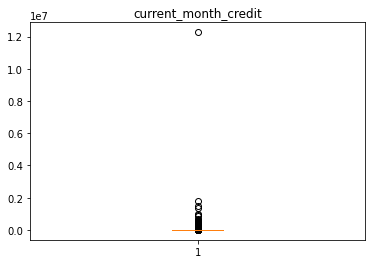

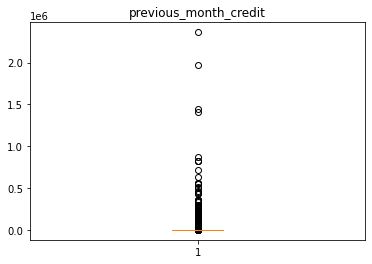

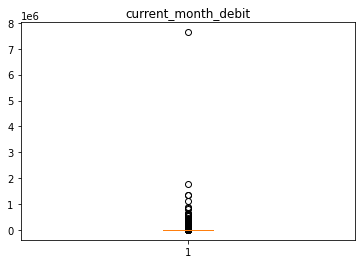

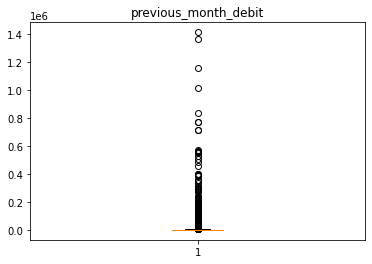

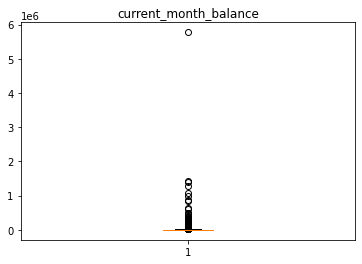

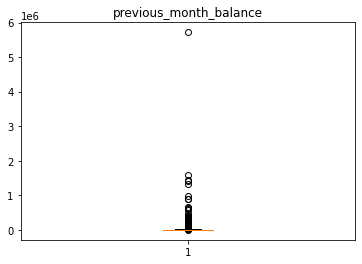

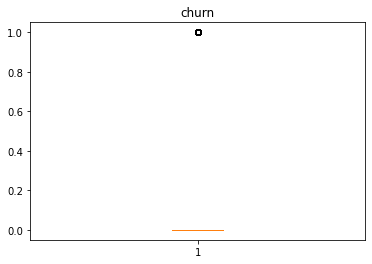

In [14]:
for i in data.columns:
    if data[i].dtype != 'object':
        fig, axs = plt.subplots()
        axs.boxplot(data[i])
        axs.set_title(i)

<b> Here I have not dealt with the outliers because the data is of money and such variations do exist in real banks so reducing them will effect the generality of my model so I have left it as it is. <b/>

In [15]:
# data.loc[data['vintage']>5500,'vintage']=np.mean(data['vintage'])
# data['vintage'].plot.box()

In [16]:
# data.loc[data['days_since_last_transaction']>90,'days_since_last_transaction']=np.mean(data['days_since_last_transaction'])
# data['days_since_last_transaction'].plot.box()

In [17]:
# #np.power(data['current_balance'],1/3).plot.hist()
# data['current_balance']=np.log(data['current_balance'])
# data['current_balance'].plot.box()
# # data['current_balance'].plot.box()

In [18]:
# data.loc[data['current_balance']<0.4,'current_balance']=np.mean(data['current_balance'])
# data['current_balance'].plot.box()

In [19]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [20]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [21]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [22]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [23]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [24]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [25]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

In [26]:
# data.loc[data['']>90,'']=np.mean(data[''])
# data[''].plot.box()

### Using One-Hot Encoding

In [27]:
data=pd.get_dummies(data)
data.head()

,customer_id,vintage,age,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,city_1643.0,city_1644.0,city_1645.0,city_1646.0,city_1647.0,city_1648.0,city_1649.0,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,1,3135,66,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,...,0,0,0,0,0,0,0,0,1,0
1,2,310,35,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,...,0,0,0,0,0,0,0,0,1,0
2,4,2356,31,41,30.0,3913.16,5815.29,4910.17,2815.94,0.61,...,0,0,0,0,0,0,0,0,1,0
3,5,478,90,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,...,0,0,0,0,0,0,0,0,1,0
4,6,2531,42,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,...,0,0,0,0,0,0,0,0,0,1


### Separating independent and dependent variables 

In [28]:
x = data.drop(['churn'],axis=1)  # independent variable
y = data['churn']  # dependent variable
x.shape, y.shape

((28382, 1644), (28382,))

<b> Using Standard Scaler to scale the data </b>

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [30]:
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()

,customer_id,vintage,age,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,city_1643.0,city_1644.0,city_1645.0,city_1646.0,city_1647.0,city_1648.0,city_1649.0,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,-1.731304,0.478644,0.999147,-0.182318,1.927027,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,...,-0.043254,-0.018774,-0.015707,-0.005936,-0.014541,-0.028479,-0.005936,-0.38784,0.974396,-0.743959
1,-1.731190,-1.275909,-0.741756,2.439824,-0.066312,-0.046720,0.028425,0.007249,0.118793,-0.044540,...,-0.043254,-0.018774,-0.015707,-0.005936,-0.014541,-0.028479,-0.005936,-0.38784,0.974396,-0.743959
2,-1.730961,-0.005178,-0.966389,-0.943689,-0.430947,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,...,-0.043254,-0.018774,-0.015707,-0.005936,-0.014541,-0.028479,-0.005936,-0.38784,0.974396,-0.743959
3,-1.730847,-1.171568,2.346943,-0.366796,0.991130,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,...,-0.043254,-0.018774,-0.015707,-0.005936,-0.014541,-0.028479,-0.005936,-0.38784,0.974396,-0.743959
4,-1.730733,0.103512,-0.348649,-0.573667,-0.090621,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,...,-0.043254,-0.018774,-0.015707,-0.005936,-0.014541,-0.028479,-0.005936,-0.38784,-1.026277,1.344159


In [31]:
scaled_x = scaled_data.drop(['churn'],axis=1)
scaled_y = scaled_data['churn']
scaled_x.shape, scaled_y.shape

((28382, 1644), (28382,))

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56,test_size=0.30, stratify=y)

In [33]:
scaled_train_x,scaled_test_x,scaled_train_y,scaled_test_y = train_test_split(scaled_x,scaled_y, random_state = 56,
                                                                             test_size=0.30, stratify=y)

In [34]:
train_y.value_counts(normalize=True),test_y.value_counts(normalize=True)

(0    0.814668
 1    0.185332
 Name: churn, dtype: float64,
 0    0.81468
 1    0.18532
 Name: churn, dtype: float64)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [36]:
train_y.describe()

count    19867.000000
mean         0.185332
std          0.388577
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [37]:
# Creating instance of Logistic Regresssion
LR = LogReg(n_jobs=-1)

# Fitting the model
LR.fit(train_x, train_y)

LogisticRegression(n_jobs=-1)

In [38]:
train_predict = LR.predict(train_x)

In [39]:
test_predict = LR.predict(test_x)

In [40]:
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.1466275659824047


In [41]:
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.15688487584650113


In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [43]:
scaled_train_y=le.fit_transform(scaled_train_y)
scaled_test_y=le.fit_transform(scaled_test_y)
scaled_train_y.shape, scaled_test_y.shape

((19867,), (8515,))

# K- Nearest Neighbours (KNN)

In [44]:
#importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [45]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10,n_jobs=-1)

# Fitting the model
clf.fit(scaled_train_x, scaled_train_y)



KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [46]:
# Predicting over the Train Set and calculating F1
test_predict = clf.predict(scaled_test_x)
k = f1_score(test_predict, scaled_test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.016019716574245228


In [47]:
# Creating instance of KNN
clf = KNN(n_neighbors = 1)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.41642228739002934


In [48]:
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Test F1 Score    ', k )

Test F1 Score     1.0


In [49]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [50]:
#Defining K range
k = range(6, 20, 2)

In [51]:
# calling above defined function
test = Elbow(k)

<b>Elbow curve</b>

Text(0.5, 1.0, 'Elbow Curve for test')

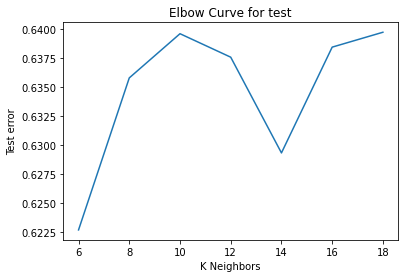

In [52]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

# Random Forest

In [65]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [66]:
#creating a random forest instance
RFclf = RandomForestClassifier(random_state=96,n_jobs=-1,criterion='entropy')

In [67]:
#train the model
RFclf.fit(scaled_train_x,scaled_train_y)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=96)

In [68]:
#score on training data
RFclf.score(scaled_train_x, scaled_train_y)

1.0

In [69]:
#score on test data
RFclf.score(scaled_test_x, scaled_test_y)

0.8563711098062243